In [22]:
import pyart
import numpy as np
from matplotlib import pyplot as plt
import time
%matplotlib inline

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-02-02 10:54:36.969681. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [14]:
fname = '/Users/scollis/Downloads/Ka2160616003008.RAW7V16'
radar = pyart.io.read(fname)
raw_radar = pyart.io.read(fname)

/Users/scollis/anaconda/envs/houston/lib/python3.5/site-packages/pyart/io/sigmet.py:141: RuntimeWarning: invalid value encountered in sqrt
  sigmet_data, sigmet_metadata = sigmetfile.read_data(full_xhdr=full_xhdr)
/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-02-02 10:53:57.335737. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


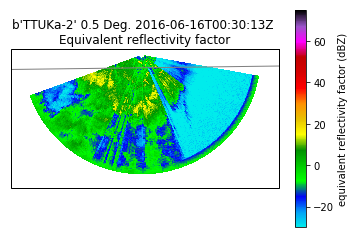

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-02-02 10:53:57.690963. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [15]:
my_d = pyart.graph.RadarMapDisplayCartopy(radar)
my_d.plot_ppi_map('reflectivity', 0)

In [16]:
x_1 = radar.gate_x['data']
heading = 135.0
radar.azimuth['data'] = radar.azimuth['data'] + heading
az_try2 = np.where(radar.azimuth['data'] > 360.)
radar.azimuth['data'][az_try2] = radar.azimuth['data'][az_try2] -360.

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-02-02 10:53:59.943582. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [17]:
x_2 = radar.gate_x['data']
radar.init_gate_x_y_z()
x_3 = radar.gate_x['data']

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-02-02 10:54:00.054634. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [18]:
print((x_1-x_2).sum())
print((x_1-x_3).sum())


0.0
3912511248.04


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-02-02 10:54:00.154771. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


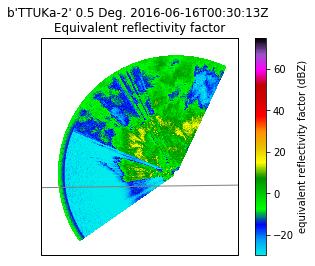

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-02-02 10:54:00.189418. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [19]:
my_d = pyart.graph.RadarMapDisplayCartopy(radar)
my_d.plot_ppi_map('reflectivity', 0)

In [24]:
def grid_radar(radar, grid_shape=(20, 501, 501), xlim=(-15000, 15000),
               ylim=(-15000, 15000), zlim=(0, 20000),    #zlim=(1000, 20000)
               fields=['reflectivity'], origin=None):
    bt = time.time()
    radar_list = [radar]
    if origin is None:
        origin = (radar.latitude['data'][0],
                  radar.longitude['data'][0])
    grid = pyart.map.grid_from_radars(
        radar_list, grid_shape=grid_shape,
        grid_limits=(zlim, ylim, xlim),
        grid_origin=origin, fields=fields,
        gridding_algo='map_gates_to_grid', grid_origin_alt=0.0)
    print(time.time()-bt, 'seconds to grid radar')
    return grid


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-02-02 10:54:46.869870. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [34]:
grid_raw = grid_radar(raw_radar, origin=(raw_radar.latitude['data'][0], raw_radar.longitude['data'][0]))
grid_corrected = grid_radar(radar, origin=(radar.latitude['data'][0], radar.longitude['data'][0]))

1.8891890048980713 seconds to grid radar
1.7900550365447998 seconds to grid radar


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-02-02 10:58:16.773537. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


/Users/scollis/anaconda/envs/houston/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3435: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/scollis/anaconda/envs/houston/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3444: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


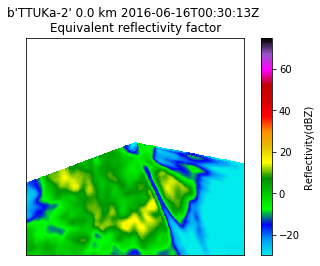

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-02-02 10:58:28.259338. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [36]:
my_d = pyart.graph.GridMapDisplay(grid_raw)
my_d.plot_grid('reflectivity', 0)


/Users/scollis/anaconda/envs/houston/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3435: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/scollis/anaconda/envs/houston/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3444: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


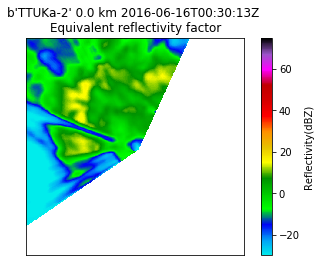

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-02-02 10:58:47.845847. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [38]:
my_d = pyart.graph.GridMapDisplay(grid_corrected)
my_d.plot_grid('reflectivity', 0)
